<h1>Распознавание рукописных цифр базы MNIST</h1>
<br>
Перед началом работы возникает 2 вопроса:
<br>
- Где взять обучающую выборку?
<br>
- Какую структуру НС использовать?
<br>
<br>
Для решения первого вопроса можно воспользоваться уже готовой выборкой MNIST - (сокращение от «Modified National Institute of Standards and Technology») - база данных образцов рукописного написания цифр. Она поставляется вместе с keras, для доступа к ней нужно выполнить следующие импорты:
<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist        # Библиотека базы выборок MNIST
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


<br>
В данной обучающей выборке 60000 изображений относятся к обучающей выборке и 10000 - к тестовой
<br><br>
Для того, чтобы загрузить все эти изображения следует воспользоваться методом load_data():
<br><br>
(x_train, y_train), (x_test, y_test) = mnist.load_data()
<br>
<ul>
<li>x_train - изображения цифр обучающей выборки;</li>
<li>y_train - вектор соответствующих значений цифр (например, если на і-м изображении нарисована 5, тo y_train[i] = 5);</li>
<li>x_test - изображения цифр тестовой выборки;</li>
<li>y_test - вектор соответствующих значений цифр для тестовой выборки.</li>
</ul>
<br>
<hr>
<br>
Каждое изображение в базе данных имеет размер 28*28 пикселей и представлено в градациях серого: (0 - черный цвет, 255 - белый цвет)
<br><br>
Для примера посмотрим первые 25 изображений из обучающей выборки:
<br><br>

In [2]:
#Загрузка изображений
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Стандартизация значений
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Стандартизация входных значений нужна, чтобы значения входных данных находились в диапазоне от 0 до 1. Т.е. получая на вод данные цвета (0-255) мы делим полученное число на 255, преобразовывая его в число диапазона 0-1
<br><br>
Также следует подготовить правильный формат выходных значений:
<br>
<br>
Так как на выходе НС имеются 10 нейронов, то и из скрытого слоя следует получать не 1 значение, а вектор, в котором 1 будет стоять на месте нужного числа<br>
Для этого следует вызвать функцию to_categorical и передать ей 1) полученное значение 2) длину вектора

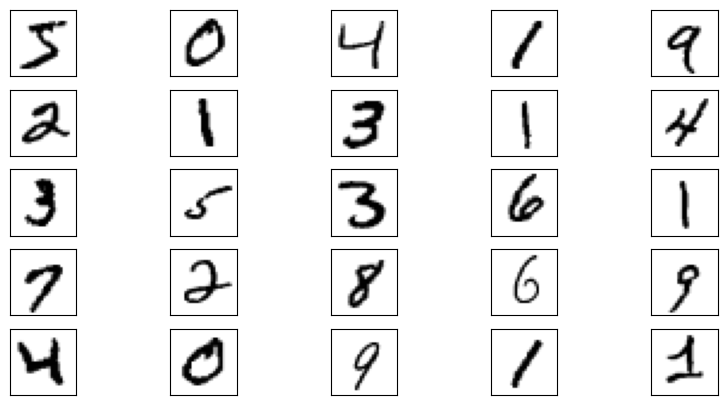

In [4]:
# Отображение первых 25 изображений из обучающей выборки

plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

<br><br>
Для решения этой задачи воспользуемся обычной полносвязной нейронной сетью, со следующей структурой:
<br>
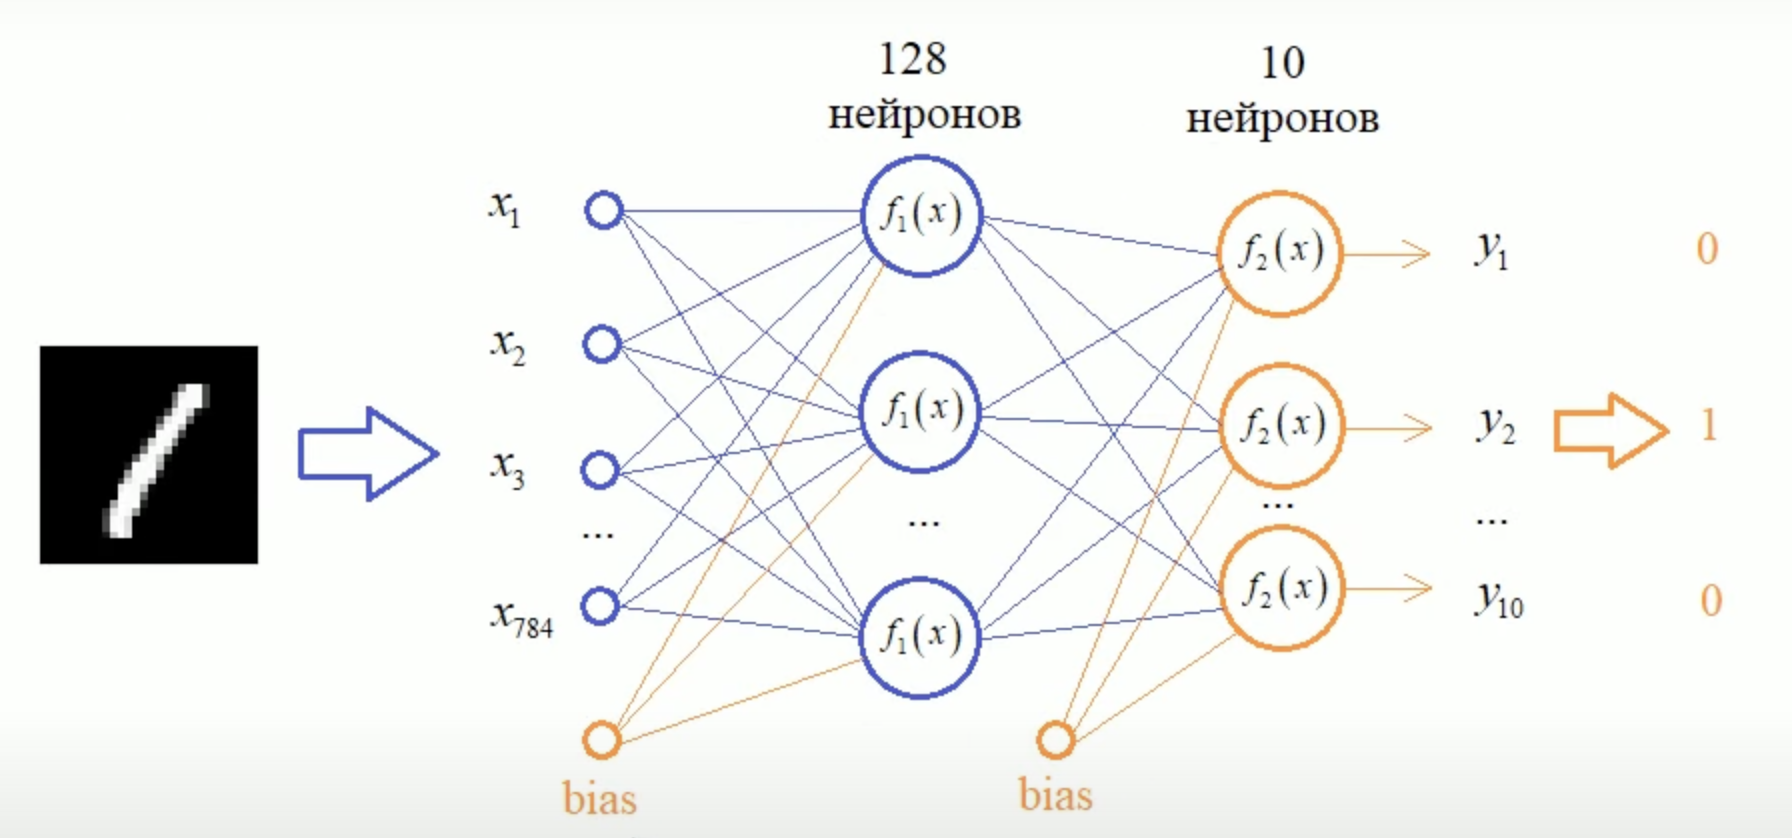
<br>
<ul>
<li>28 x 28 = 784 входа</li>
<li>128 нейронов скрытого слоя</li>
<li>10 нейронов выходного слоя (Каждый выход отвечает за свою цифру 0-9)</li>
</ul>
<br>
В качестве функции активации для нейронов скрытого слоя будет использоваться ReLu
<br>
В качестве функции активации для нейронов выходного слоя будет использоваться softmax (т.к. мы хоти получить вероятность принадлежности к тому или иному классу цифр)
<br><br>
Первый слой должен приобразовывать изображение 28х28 пикселей в вектор, состоящий из 784 элементов.<br>
Для этого в keras можно создать слой специального вида, который называеися Flatten:
<br><br>
<i>Flatten(input_shape=(28, 28, 1))</i>
<br><br>
Затем каждый вход следует связать с каждым нейроном скрытого слоя (Полносвязная нейронная сеть).<br>
Для этого нужно воспользоваться классом Dense и указать количество нейронов скрытого слоя (128) и функцию активации (relu)
<br><br>
<i>Dense(128, activation='relu')</i>
<br><br>
Затем каждый нейрон скрытого слоя следует связать с каждым выходным нейроном.<br>
Для этого нужно воспользоваться классом Dense и указать количество нейронов выходного слоя (10) и функцию активации (softmax)
<br><br>
<i>Dense(10, activation='softmax')</i>

In [5]:
# Формирование модели НС и вывод ее структуры в консоль

model = keras.Sequential([
    Flatten(input_shape = (28, 28, 1)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

print(model.summary()) # Вывод структуры

/Users/dmitriideren/PycharmProjects/KI/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


Рассмотрим получившиеся данные:
<br><br>
У первого слоя нет никаких настраиваемых параметров (Param: 0)
<br><br>
У скрытого слоя 100480 настраиваемых парамеров. Откуда они взялись: <br>
(784 входа + 1 bias) * 128 скрытых нейронов = 100480 - Число связей (весовых коэффициентов), которые будут настраиваться в процессе обучения
<br><br>
У выходного слоя 1290 настраиваемых парамеров. Откуда они взялись: <br>
(128 скрытых нейрона + 1 bias) * 10 скрытых нейронов = 1290
<br><br>
Затем  следует выбрать функцию потерь и способ оптимизации градиентного алгоритма
<br>

In [6]:
# Компиляция НС с оптимизацией по Adam и критерием - Категориальная кросс-энтропия

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',  # В задачах классификации лучше всего использовать именно категориальную кроссэнтропию
    metrics = ['accuracy']
)

In [7]:
# Запуск процесса обучения: 80% - обучающая выборка, 20% - выборка валидации

model.fit(
    x_train,                  # Входной параметр
    y_train_cat,              # Ожидаемый выходной параметр
    batch_size = 32,          # Размер батча (Корректировка весов после каждых 32 картинок)
    epochs = 10,               # Количество эпох (повторений)
    validation_split = 0.2    # Разбиение обучающей выборки на обучающую и проверочную
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8658 - loss: 0.4725 - val_accuracy: 0.9528 - val_loss: 0.1609
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.9594 - loss: 0.1425 - val_accuracy: 0.9596 - val_loss: 0.1282
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 0.9743 - loss: 0.0881 - val_accuracy: 0.9678 - val_loss: 0.1047
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - accuracy: 0.9817 - loss: 0.0637 - val_accuracy: 0.9711 - val_loss: 0.0969
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step - accuracy: 0.9847 - loss: 0.0493 - val_accuracy: 0.9724 - val_loss: 0.0911
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9891 - loss: 0.0367 - val_accuracy: 0.9742 - val_loss: 0.0894
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9912 - loss: 0.0300 - val_accuracy: 0.9773 - val_loss: 0.0834
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9941 - loss: 0

In [8]:
# Подача на вход тестового множества

model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.9725 - loss: 0.0948


[0.07940196245908737, 0.9775000214576721]

<br><br><br>
<h2>Проверка распознавания цифр</h2>
<br>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[8.8374412e-07 1.0715170e-08 1.2619236e-10 7.4071919e-05 4.9858581e-06
  7.9170704e-06 1.4648387e-12 8.6988546e-03 2.1356833e-05 9.9119192e-01]]
Распознанная цифра: 9


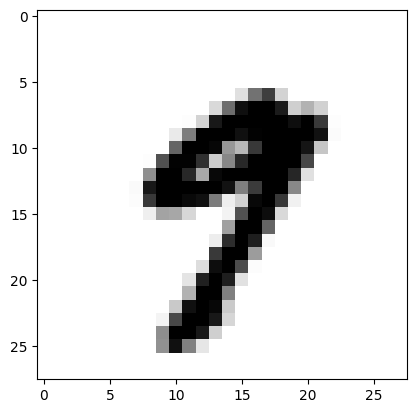

In [9]:
n = 20
x = np.expand_dims(x_test[n], axis=0)

res = model.predict(x)
print(res)
print(f'Распознанная цифра: {np.argmax(res)}')   # Выбор индекса максимального значения

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [10]:
# Распознавание всей тестовой выборки

pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Мы получаем 10000 выходов, каждый из которых является вектором из 10 элементов

<br><br>

In [28]:
# Выделение неверных вариантов

mask = pred == y_test  # Формирование маски, обозначенной буевым условием pred == y_test (Совпадают - true, не совпадают - false)
print(mask[:10])

x_false = x_test[~mask]  # Отбор из тестовой выборки тех значений, у которых маска равняется false (~... - инверсия)
p_false = pred[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(205, 28, 28)


205 изображений из 10000 были распознаны неверно
<br><br>

Значение сети: 5


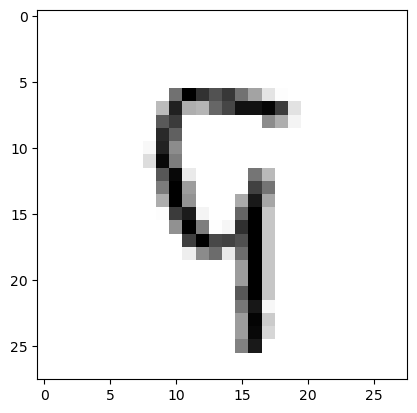

Значение сети: 6


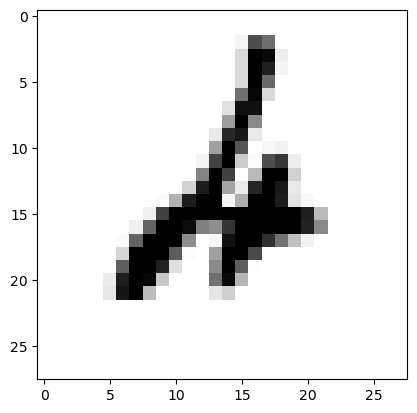

Значение сети: 7


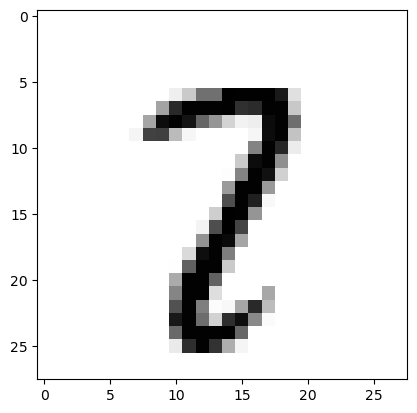

Значение сети: 3


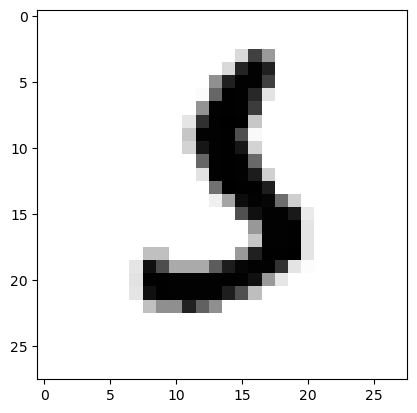

Значение сети: 7


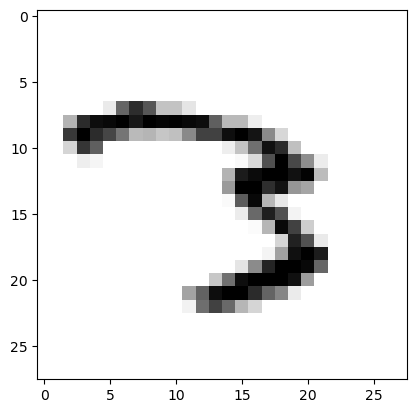

In [29]:
# Вывод первых 5 неверных результатов

for i in range(5):
    print(f'Значение сети: {str(p_false[i])}')
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()